In [143]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

In [145]:
# Tworzenie DataFrame z cech
X_df = pd.DataFrame(X)

# Dodawanie etykiet do DataFrame
X_df['target'] = y

print(X_df.head())  


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [146]:
X_df.to_excel('output.xlsx', index=False)

In [147]:
missing_values = X_df.isnull().sum()
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

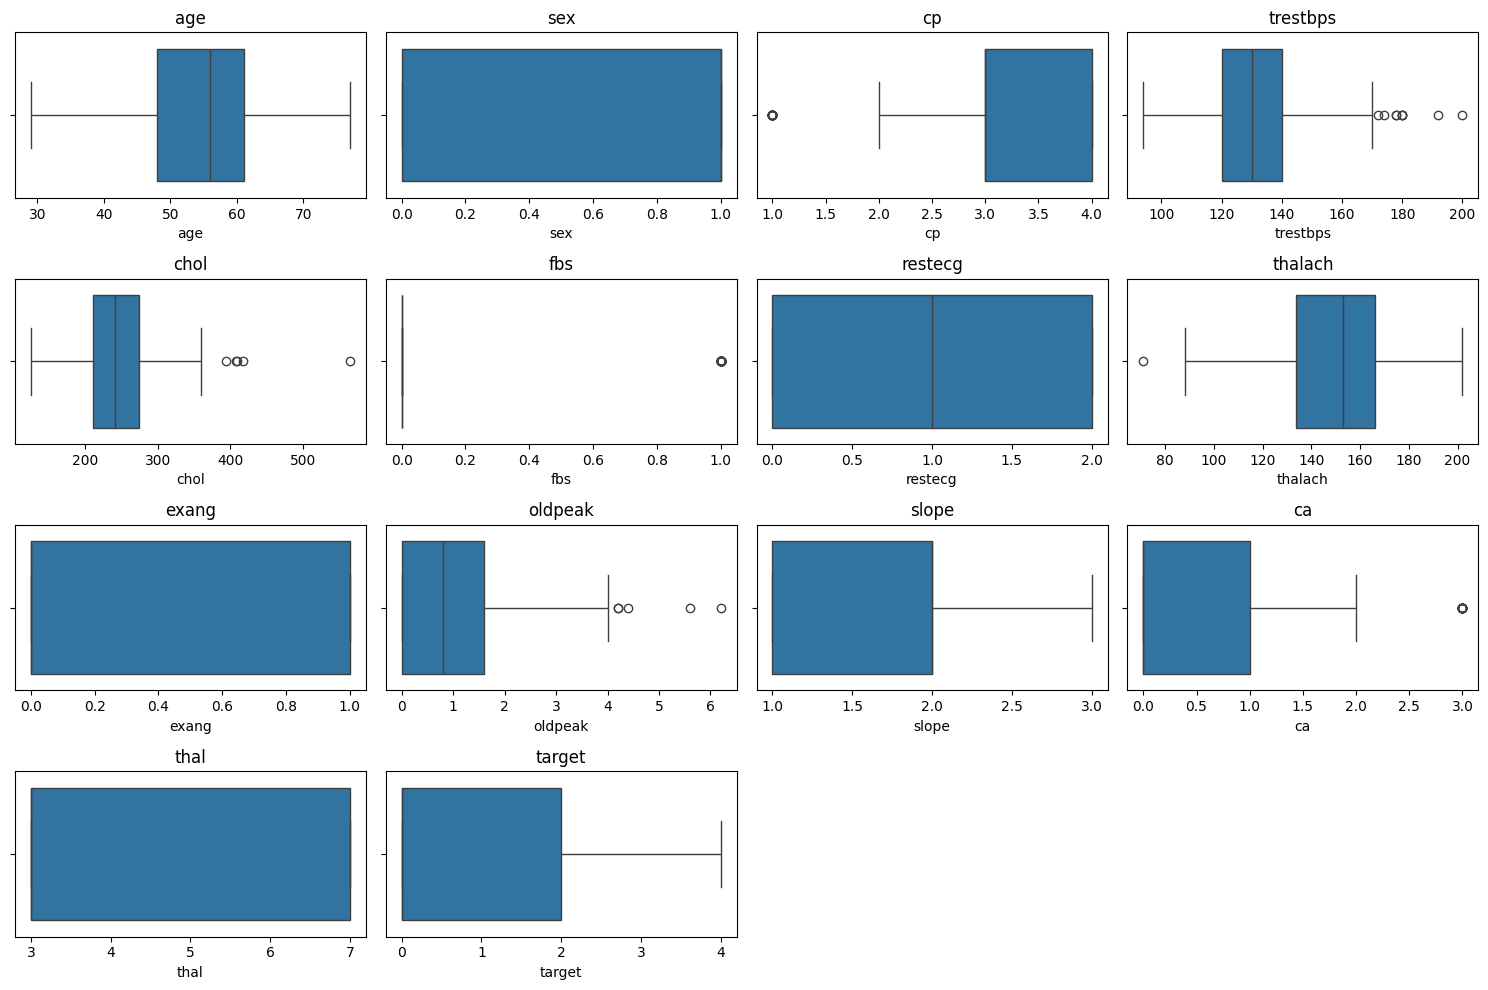

In [148]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_df.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(X_df[column], orient='h')
    plt.title(column)

plt.tight_layout()
plt.show()

In [149]:
data = X_df.dropna()

In [150]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


In [151]:
features_to_scale = data.columns.drop(['target', 'ca', 'thal'])

scaler = StandardScaler()

data.loc[:, features_to_scale] = scaler.fit_transform(data[features_to_scale])

### Z-score

In [152]:
from scipy.stats import zscore

data_1 = pd.read_excel('output.xlsx')

continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Oblicz Z-score tylko dla kolumn ciągłych
data_1[continuous_columns] = data_1[continuous_columns].apply(zscore)

print(data_1[continuous_columns])

          age  trestbps      chol   thalach   oldpeak
0    0.948726  0.757525 -0.264900  0.017197  1.087338
1    1.392002  1.611220  0.760415 -1.821905  0.397182
2    1.392002 -0.665300 -0.342283 -0.902354  1.346147
3   -1.932564 -0.096170  0.063974  1.637359  2.122573
4   -1.489288 -0.096170 -0.825922  0.980537  0.310912
..        ...       ...       ...       ...       ...
298 -1.046013 -1.234430  0.334813 -0.770990  0.138373
299  1.502821  0.700612 -1.038723 -0.376896  2.036303
300  0.283813 -0.096170 -2.238149 -1.515388  0.138373
301  0.283813 -0.096170 -0.206864  1.068113 -0.896862
302 -1.821745  0.359134 -1.386944  1.024325 -0.896862

[303 rows x 5 columns]


In [153]:
# Ustal próg dla identyfikacji obserwacji odstających
threshold = 3

# Znajdź obserwacje odstające na podstawie standardowego Z-score
outliers_standard_z = data_1.loc[(np.abs(data_1[continuous_columns]) > threshold).any(axis=1)]

print(outliers_standard_z)

          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
48   1.170364    0   3  0.472960  3.294686    1        2  0.323714      0   
91   0.837908    0   4  1.611220 -1.599745    0        2 -0.201743      0   
121  0.948726    0   4  1.042090  3.101230    0        2  0.192350      0   
123  0.062176    1   4  0.472960 -0.574430    0        0 -1.690541      1   
126  0.172994    0   4  3.887739  0.799106    1        2 -0.727201      1   
152  1.392002    0   3 -0.949865  6.138485    0        2  0.455079      0   
181  0.172994    0   4  0.131482  3.139921    0        2  0.017197      1   
188 -0.048643    1   2  3.432436  0.702378    0        2  1.987664      0   
245  1.392002    1   4 -0.665300 -0.187518    0        0 -3.442067      0   

      oldpeak  slope   ca  thal  target  
48  -0.206705      1  1.0   3.0       0  
91   4.451851      3  3.0   7.0       3  
121  2.553921      2  3.0   7.0       4  
123  3.934233      3  0.0   7.0       3  
126  2.553921      

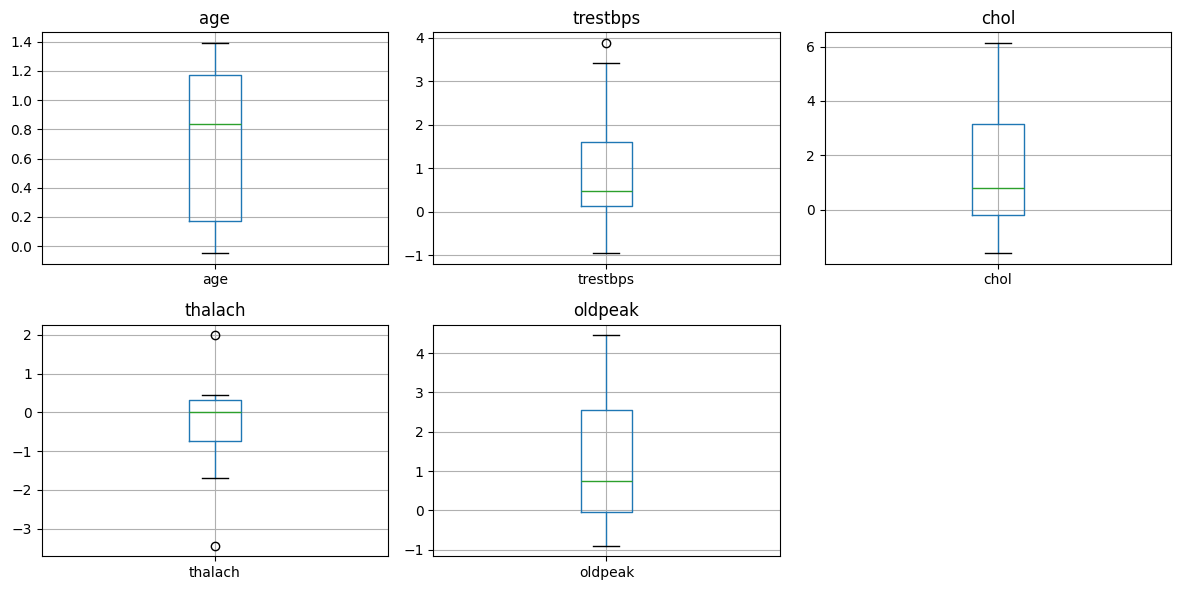

In [154]:
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 6))
for i, column in enumerate(continuous_columns):
    plt.subplot(2, 3, i+1)
    outliers_standard_z.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()


#### modified Z-score

In [155]:
def modified_z_score(observations):
    median_observation = np.median(observations)
    mad = np.median(np.abs(observations - median_observation))
    modified_z_scores = 0.6745 * (observations - median_observation) / mad
    return modified_z_scores

# Aplikuj funkcję tylko do kolumn ciągłych
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for column in continuous_columns:
    data_1[column + '_mod_z'] = modified_z_score(data_1[column])

# Wyświetl wyniki
print(data_1[[col + '_mod_z' for col in continuous_columns]])


     age_mod_z  trestbps_mod_z  chol_mod_z  thalach_mod_z  oldpeak_mod_z
0     0.786917         1.01175   -0.168625      -0.134900       1.264687
1     1.236583         2.02350    0.948516      -2.023500       0.590187
2     1.236583        -0.67450   -0.252937      -1.079200       1.517625
3    -2.135917         0.00000    0.189703       1.528867       2.276438
4    -1.686250         0.00000   -0.779891       0.854367       0.505875
..         ...             ...         ...            ...            ...
298  -1.236583        -1.34900    0.484797      -0.944300       0.337250
299   1.349000         0.94430   -1.011750      -0.539600       2.192125
300   0.112417         0.00000   -2.318594      -1.708733       0.337250
301   0.112417         0.00000   -0.105391       0.944300      -0.674500
302  -2.023500         0.53960   -1.391156       0.899333      -0.674500

[303 rows x 5 columns]


In [156]:
# Ustal próg dla identyfikacji obserwacji odstających
threshold = 3

# Znajdź obserwacje odstające
outliers = data_1.loc[(np.abs(data_1[[col + '_mod_z' for col in continuous_columns]]) > threshold).any(axis=1)]

# Wyświetl obserwacje odstające
print(outliers)

          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
48   1.170364    0   3  0.472960  3.294686    1        2  0.323714      0   
83   1.502821    1   3  2.749480  0.528268    1        2  0.017197      1   
91   0.837908    0   4  1.611220 -1.599745    0        2 -0.201743      0   
121  0.948726    0   4  1.042090  3.101230    0        2  0.192350      0   
123  0.062176    1   4  0.472960 -0.574430    0        0 -1.690541      1   
126  0.172994    0   4  3.887739  0.799106    1        2 -0.727201      1   
132 -2.819115    1   2 -0.096170 -0.825922    0        2  2.294182      0   
152  1.392002    0   3 -0.949865  6.138485    0        2  0.455079      0   
173  0.837908    0   4  0.472960  2.849737    0        2  0.323714      0   
181  0.172994    0   4  0.131482  3.139921    0        2  0.017197      1   
183  0.505451    1   1  2.635654  0.450886    0        2 -0.201743      0   
188 -0.048643    1   2  3.432436  0.702378    0        2  1.987664      0   

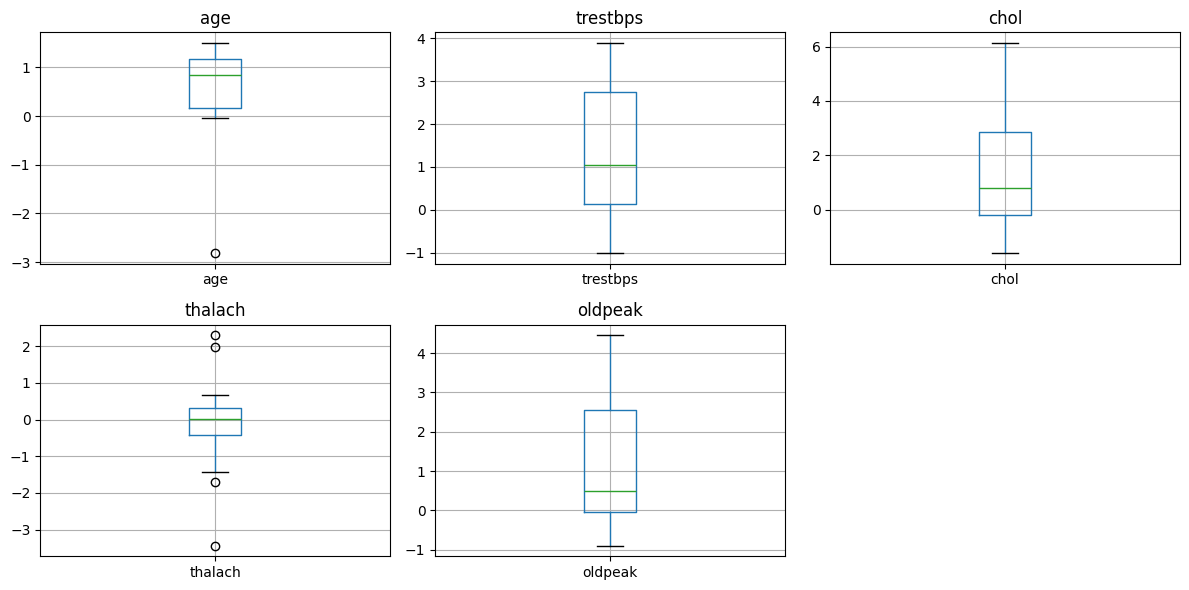

In [157]:
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 6))
for i, column in enumerate(continuous_columns):
    plt.subplot(2, 3, i+1)
    outliers.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()


### LOF

In [158]:
data_lof = pd.read_excel('output.xlsx')
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_lof[continuous_columns])

#detektor lof
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

lof_predictions = lof.fit_predict(scaled_data)

data_lof['lof_score'] = -lof.negative_outlier_factor_  

threshold = 1.5 
outliers_lof = data_lof[data_lof['lof_score'] > threshold]

print(outliers_lof)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
3     37    1   3       130   250    0        0      187      0      3.5   
91    62    0   4       160   164    0        2      145      0      6.2   
123   55    1   4       140   217    0        0      111      1      5.6   
126   56    0   4       200   288    1        2      133      1      4.0   
152   67    0   3       115   564    0        2      160      0      1.6   
188   54    1   2       192   283    0        2      195      0      0.0   
211   38    1   1       120   231    0        0      182      1      3.8   

     slope   ca  thal  target  lof_score  
3        3  0.0   3.0       0   1.511598  
91       3  3.0   7.0       3   1.822974  
123      3  0.0   7.0       3   1.575768  
126      3  2.0   7.0       3   1.728072  
152      2  0.0   7.0       0   2.654452  
188      1  1.0   7.0       1   1.723644  
211      2  0.0   7.0       4   1.539573  


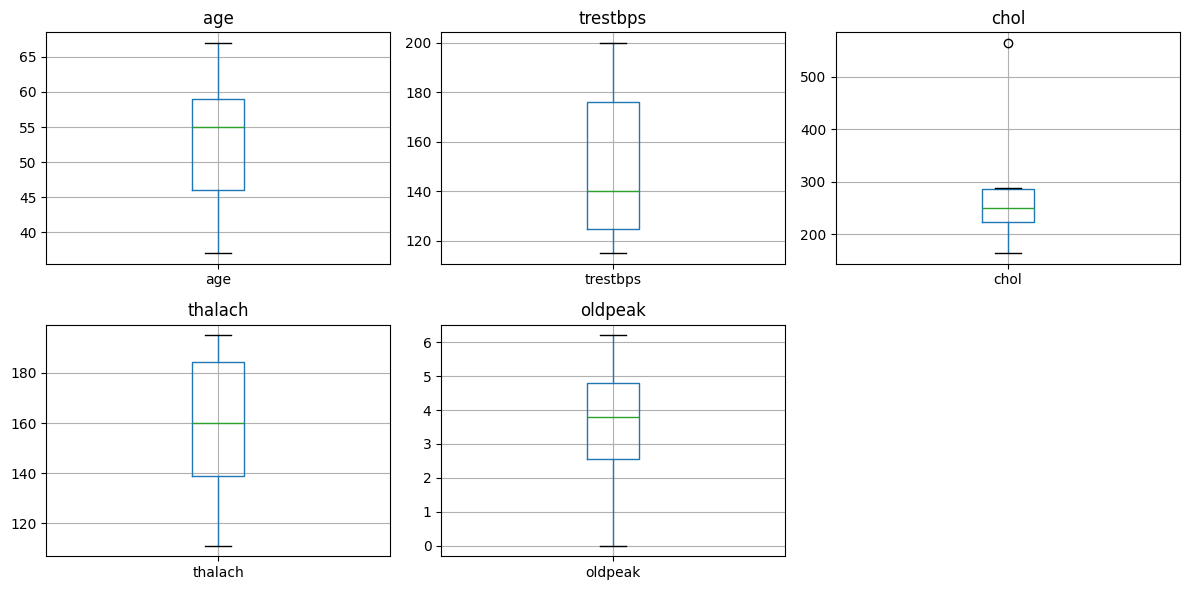

In [159]:
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 6))
for i, column in enumerate(continuous_columns):
    plt.subplot(2, 3, i+1)
    outliers_lof.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

### one-class SVM and isolation forest

In [160]:
data_svm = pd.read_excel('output.xlsx')

continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X = data_svm[continuous_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-Class SVM
oc_svm = OneClassSVM(gamma='auto').fit(X_scaled)
data_svm['oc_svm_pred'] = oc_svm.predict(X_scaled)

# Isolation Forest
iso_forest = IsolationForest(contamination='auto', random_state=42).fit(X_scaled)
data_svm['iso_forest_pred'] = iso_forest.predict(X_scaled)

# Filtruj anomalie
anomalies_oc_svm = data_svm[data_svm['oc_svm_pred'] == -1]
anomalies_iso_forest = data_svm[data_svm['iso_forest_pred'] == -1]

print("Anomalie wykryte przez One-Class SVM:")
print(anomalies_oc_svm[continuous_columns])

print("\nAnomalie wykryte przez Isolation Forest:")
print(anomalies_iso_forest[continuous_columns])

Anomalie wykryte przez One-Class SVM:
     age  trestbps  chol  thalach  oldpeak
1     67       160   286      108      1.5
2     67       120   229      129      2.6
3     37       130   250      187      3.5
6     62       140   268      160      3.6
7     57       120   354      163      0.6
..   ...       ...   ...      ...      ...
295   41       120   157      182      0.0
296   59       164   176       90      1.0
299   68       144   193      141      3.4
300   57       130   131      115      1.2
302   38       138   175      173      0.0

[151 rows x 5 columns]

Anomalie wykryte przez Isolation Forest:
     age  trestbps  chol  thalach  oldpeak
3     37       130   250      187      3.5
29    40       110   167      114      2.0
48    65       140   417      157      0.8
68    59       170   326      140      3.4
69    46       150   231      147      3.6
80    45       104   208      148      3.0
82    39       140   321      182      0.0
83    68       180   274      150   

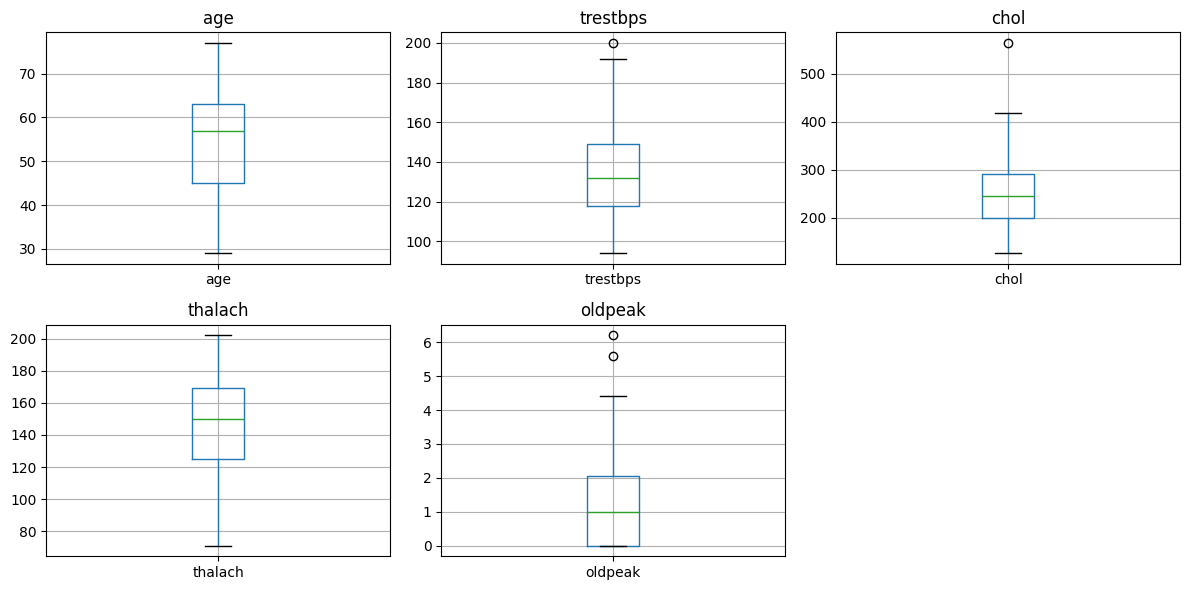

In [161]:
# One-Class SVM
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 6))
for i, column in enumerate(continuous_columns):
    plt.subplot(2, 3, i+1)
    anomalies_oc_svm.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

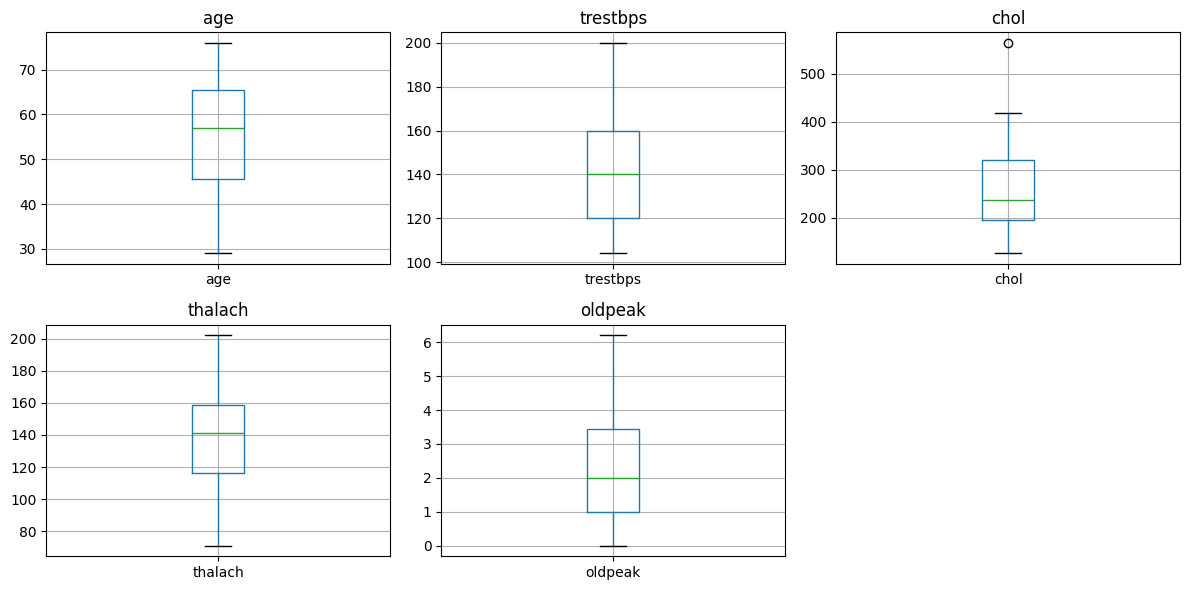

In [162]:
# Isolation Forest
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 6))
for i, column in enumerate(continuous_columns):
    plt.subplot(2, 3, i+1)
    anomalies_iso_forest.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

DBSCAN and OPTICS

In [163]:
data_db = pd.read_excel('output.xlsx')

continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X = data_db[continuous_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5) 
dbscan_labels = dbscan.fit_predict(X_scaled)

# Dodaj etykiety DBSCAN do oryginalnego DataFrame
data_db['dbscan_label'] = dbscan_labels

# Obserwacje odstające będą miały etykietę -1
outliers_dbscan = data_db[data_db['dbscan_label'] == -1]
print("Obserwacje odstające wykryte przez DBSCAN:")
print(outliers_dbscan)

Obserwacje odstające wykryte przez DBSCAN:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
6     62    0   4       140   268    0        2      160      0      3.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
296   59    1   4       164   176    1        2       90      0      1.0   
297   57    0   4       140   241    0        0      123      1      0.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  target  dbscan_label 

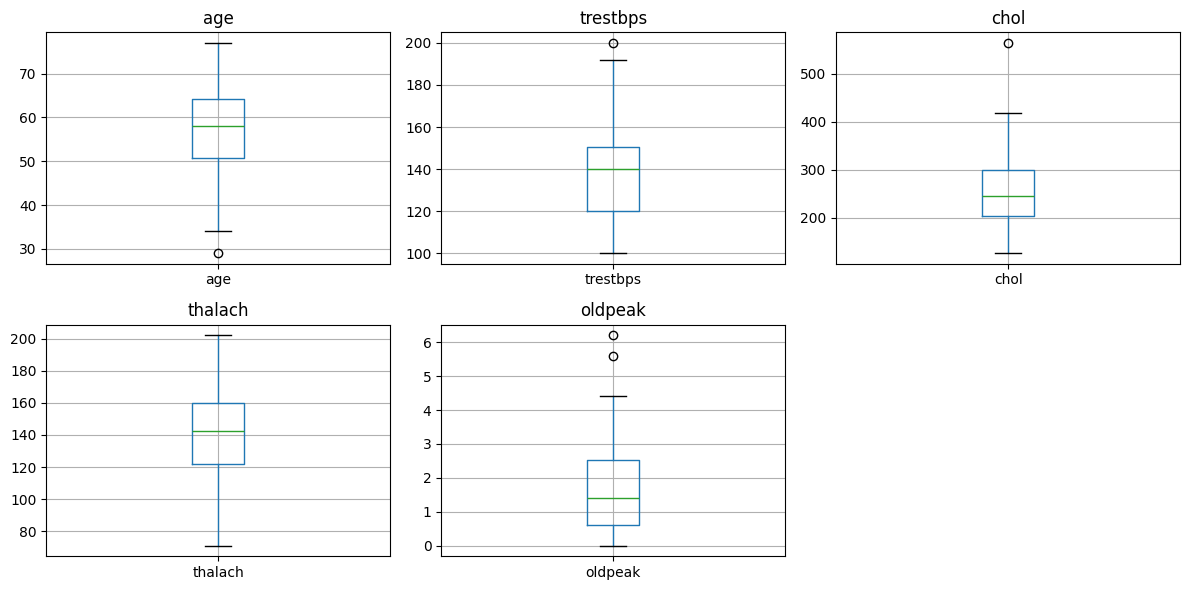

In [164]:
# DBSCAN
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 6))
for i, column in enumerate(continuous_columns):
    plt.subplot(2, 3, i+1)
    outliers_dbscan.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [165]:
data_opt = pd.read_excel('output.xlsx')
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05) 
optics_labels = optics.fit_predict(X_scaled)

data_opt['optics_label'] = optics_labels

outliers_optics = data_opt[data_opt['optics_label'] == -1]
print("Obserwacje odstające wykryte przez OPTICS:")
print(outliers_optics)

Obserwacje odstające wykryte przez OPTICS:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
3     37    1   3       130   250    0        0      187      0      3.5   
68    59    1   4       170   326    0        2      140      1      3.4   
91    62    0   4       160   164    0        2      145      0      6.2   
121   63    0   4       150   407    0        2      154      0      4.0   
123   55    1   4       140   217    0        0      111      1      5.6   
126   56    0   4       200   288    1        2      133      1      4.0   
152   67    0   3       115   564    0        2      160      0      1.6   
188   54    1   2       192   283    0        2      195      0      0.0   
211   38    1   1       120   231    0        0      182      1      3.8   
231   55    0   4       180   327    0        1      117      1      3.4   
280   57    1   4       110   335    0        0      143      1      3.0   
296   59    1   4       164   176    1       

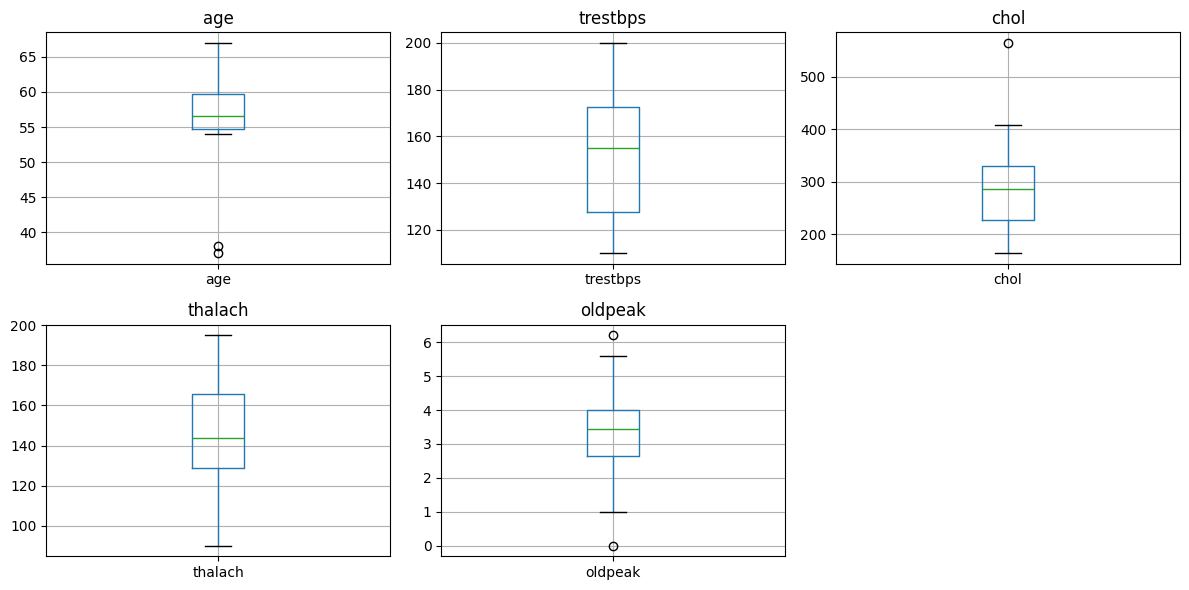

In [166]:
# OPTICS
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 6))
for i, column in enumerate(continuous_columns):
    plt.subplot(2, 3, i+1)
    outliers_optics.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()